# Using ML to map the music I like

Here we will use some ML models to try to disentagle the music I like. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

df = pd.read_csv('data.csv', index_col=0).dropna()

mpl.rcParams['figure.dpi'] = 100
plt.style.use('ggplot')

In [2]:
df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,fav
0,0.424,0.337,2.0,-11.554,0.0345,0.79800,0.620,0.114,0.108,119.901,4.0,fav
1,0.629,0.615,9.0,-7.732,0.0318,0.02900,0.259,0.189,0.452,129.977,4.0,fav
2,0.479,0.441,4.0,-8.938,0.0270,0.78500,0.126,0.110,0.110,103.002,4.0,fav
3,0.403,0.618,7.0,-7.978,0.0278,0.07320,0.587,0.279,0.220,133.113,4.0,fav
4,0.312,0.822,7.0,-4.759,0.0494,0.00018,0.679,0.214,0.266,148.926,4.0,fav


In [3]:
df.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,0.525770,0.677444,6.083447,-7.660554,0.059430,0.229697,0.211122,0.218116,0.441709,124.105972,3.904762
std,0.168148,0.219150,3.210029,3.814707,0.056697,0.293249,0.316159,0.208719,0.239138,27.066874,0.389285
min,0.074700,0.003790,1.000000,-31.414000,0.023200,0.000003,0.000001,0.021000,0.031300,40.068000,1.000000
25%,0.408000,0.544000,3.000000,-8.958000,0.032600,0.008210,0.000123,0.096000,0.240000,105.017000,4.000000
50%,0.529000,0.725000,6.000000,-6.809000,0.040500,0.073600,0.008350,0.124000,0.425000,124.080000,4.000000
75%,0.645000,0.853000,9.000000,-5.272000,0.059800,0.366000,0.398000,0.269000,0.628000,140.231000,4.000000
max,0.965000,0.995000,11.000000,-1.131000,0.856000,0.996000,0.993000,0.985000,0.978000,205.570000,5.000000


In [4]:
df.groupby('fav').describe()

danceability                                                        \
               count      mean       std     min      25%     50%      75%   
fav                                                                          
both             2.0  0.619500  0.101116  0.5480  0.58375  0.6195  0.65525   
fav           1469.0  0.470368  0.149567  0.0747  0.36400  0.4780  0.57300   
not fav        734.0  0.636394  0.147543  0.1490  0.54500  0.6585  0.74675   

                energy            ...     tempo          time_signature  \
           max   count      mean  ...       75%      max          count   
fav                               ...                                     
both     0.691     2.0  0.581500  ...   90.2605   92.004            2.0   
fav      0.950  1469.0  0.673438  ...  144.4900  204.629         1469.0   
not fav  0.965   734.0  0.685723  ...  134.9645  205.570          734.0   

                                                      
             mean       std  min  25%  50%  75%  max  
fav                                                   
both     4.000000  0.000000  4.0  4.0  4.0  4.0  4.0  
fav      3.876787  0.443465  1.0  4.0  4.0  4.0  5.0  
not fav  3.960490  0.238956  1.0  4.0  4.0  4.0  5.0  

[3 rows x 88 columns]

In [5]:
X = df[[col for col in df.columns if col != 'fav']]
y = np.where(df['fav'] == 'fav', 1, 0)

features = pd.Series([col for col in df.columns if col != 'fav'])

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
from sklearn.metrics import f1_score

## 1. Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
model = LogisticRegression(random_state=28)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

f1_score(y_test, y_pred)

0.8513513513513513

In [11]:
from sklearn.model_selection import GridSearchCV

params = {'C': [0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(LogisticRegression(random_state=28), param_grid=params, scoring="f1")

clf.fit(X_train, y_train)

print(f"Best parameters: {clf.best_params_}")
print(f"Best score: {clf.best_score_}")

model = clf.best_estimator_

Best parameters: {'C': 0.1}
Best score: 0.8617924829511822


### Which features matter most?

In [12]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(model)

selector.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=0.1, random_state=28))

In [13]:
best_features = features[selector.get_support()]
best_features

0        danceability
1              energy
3            loudness
6    instrumentalness
dtype: object

<AxesSubplot:xlabel='instrumentalness', ylabel='Count'>

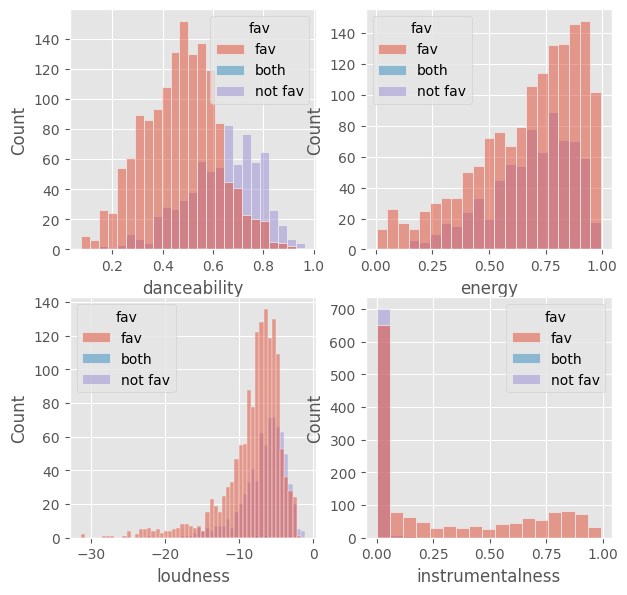

In [44]:
fig, axs = plt.subplots(2, 2, figsize = (7, 7))

sns.histplot(data = df, x = best_features[0], hue = 'fav', ax = axs[0][0])
sns.histplot(data = df, x = best_features[1], hue = 'fav', ax = axs[0][1])
sns.histplot(data = df, x = best_features[3], hue = 'fav', ax = axs[1][0])
sns.histplot(data = df, x = best_features[6], hue = 'fav', ax = axs[1][1])

## 2. Gaussian Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

f1_score(y_test, y_pred)

0.7310126582278481

## 3. Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
model = DecisionTreeClassifier(random_state=28)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

f1_score(y_test, y_pred)

0.8859416445623343

In [19]:
params = {'min_samples_split': [x for x in range(2, 10)],
          'min_samples_leaf': [x for x in range(1, 10)]}

clf = GridSearchCV(DecisionTreeClassifier(random_state=28), param_grid=params, scoring = "f1")

clf.fit(X_train, y_train)

print(f"Best parameters: {clf.best_params_}")
print(f"Best score: {clf.best_score_}")

model = clf.best_estimator_

Best parameters: {'min_samples_leaf': 7, 'min_samples_split': 2}
Best score: 0.8692994378149178


### Which features matter most?

In [20]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(model)

selector.fit(X_train, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(min_samples_leaf=7,
                                                 random_state=28))

In [21]:
best_features = features[selector.get_support()]
best_features

0        danceability
6    instrumentalness
dtype: object

<AxesSubplot:xlabel='instrumentalness', ylabel='Count'>

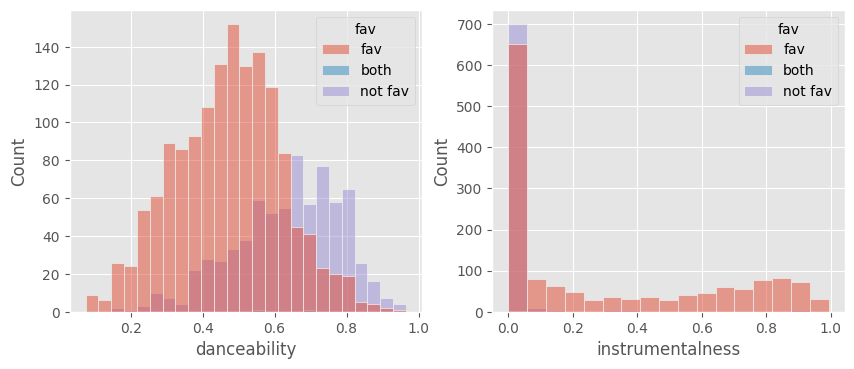

In [22]:
fig, axs = plt.subplots(1, 2, figsize = (10, 4))

sns.histplot(data = df, x = best_features[0], hue = 'fav', ax = axs[0])
sns.histplot(data = df, x = best_features[6], hue = 'fav', ax = axs[1])

## 4. Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
model = RandomForestClassifier(random_state=28)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

f1_score(y_test, y_pred)

0.9174311926605504

In [25]:
params = {'n_estimators': [10, 100, 200, 300],
          'min_samples_split': [x for x in range(2, 10)],
          'min_samples_leaf': [x for x in range(1, 10)]}

clf = GridSearchCV(RandomForestClassifier(random_state=28), param_grid=params, scoring = "f1")

clf.fit(X_train, y_train)

print(f"Best parameters: {clf.best_params_}")
print(f"Best score: {clf.best_score_}")

model = clf.best_estimator_

Best parameters: {'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
Best score: 0.9111980406405081


### Which features matter most?

In [26]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(model)

selector.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(min_samples_split=4,
                                                 n_estimators=300,
                                                 random_state=28))

In [27]:
best_features = features[selector.get_support()]
best_features

0        danceability
6    instrumentalness
dtype: object

<AxesSubplot:xlabel='instrumentalness', ylabel='Count'>

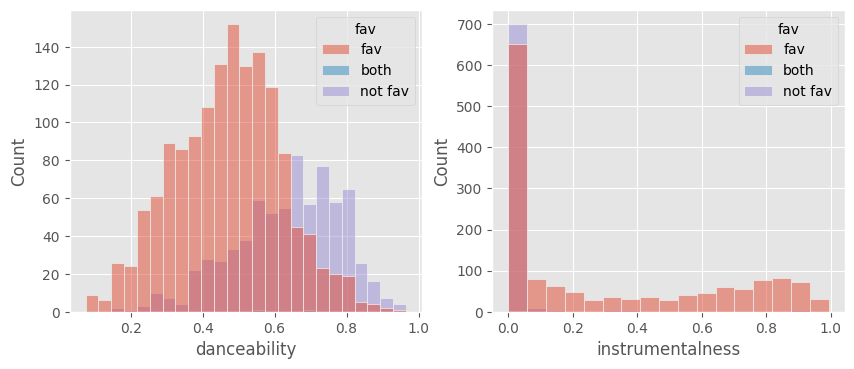

In [28]:
fig, axs = plt.subplots(1, 2, figsize = (10, 4))

sns.histplot(data = df, x = best_features[0], hue = 'fav', ax = axs[0])
sns.histplot(data = df, x = best_features[6], hue = 'fav', ax = axs[1])

## 5. SVM

In [29]:
from sklearn.svm import SVC

In [30]:
model = SVC(random_state=28)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

f1_score(y_test, y_pred)

0.8859416445623343

In [31]:
params = {'C': [0.001, 0.01, 0.1, 1],
          'kernel': ['linear', 'sigmoid']}

clf = GridSearchCV(SVC(random_state=28), param_grid=params, scoring = "f1")

clf.fit(X_train, y_train)

print(f"Best parameters: {clf.best_params_}")
print(f"Best score: {clf.best_score_}")

model = clf.best_estimator_

Best parameters: {'C': 1, 'kernel': 'linear'}
Best score: 0.8638162641307812


### Which features matter most?

In [32]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(model)

selector.fit(X_train, y_train)

SelectFromModel(estimator=SVC(C=1, kernel='linear', random_state=28))

In [33]:
best_features = features[selector.get_support()]
best_features

0        danceability
1              energy
3            loudness
6    instrumentalness
dtype: object

<AxesSubplot:xlabel='instrumentalness', ylabel='Count'>

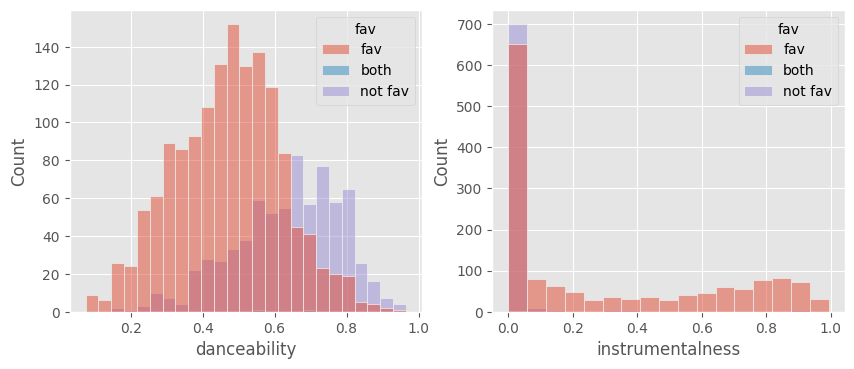

In [34]:
fig, axs = plt.subplots(1, 2, figsize = (10, 4))

sns.histplot(data = df, x = best_features[0], hue = 'fav', ax = axs[0])
sns.histplot(data = df, x = best_features[6], hue = 'fav', ax = axs[1])

## 6. K Nearest Neighbors

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
model = KNeighborsClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

f1_score(y_test, y_pred)

0.8797886393659181

In [42]:
params = {'n_neighbors': [x for x in range(5, 30)]}

clf = GridSearchCV(KNeighborsClassifier(), param_grid=params, scoring = "f1")

clf.fit(X_train, y_train)

print(f"Best parameters: {clf.best_params_}")
print(f"Best score: {clf.best_score_}")

model = clf.best_estimator_

Best parameters: {'n_neighbors': 23}
Best score: 0.8671602476087121
